# Function to Check Stationarity and perform ADCF Test (Augmented Dickey Fuller Test)

In [97]:
def test_stationarity(timeseries):
    
    # Determin Rolling Stats
    movingAverage = timeseries.rolling(window=30).mean()
    movingSTD = timeseries.rolling(window=30).std()
    
    # Plot Rolling  Stats
    orig = plt.plot(timeseries, label='Original')
    mean = plt.plot(movingAverage, label='Rolling Mean')
    #std = plt.plot(movingSTD, label='Rolling Std')
    plt.legend(loc='best')
    
    # Perform Dickey Fuller Test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-Value',
                                            '# Lags Used', 'Num of Obs Used'])
    # Print Critical Values
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)

In [60]:
def plot_original(timeseries):
    # Plot Original Data
    plt.plot(timeseries)
    
def rolling(timeseries):
    # Rolling Statistics
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    orig = plt.plot(timeseries, label='Original')
    mean = plt.plot(rolmean, label='Rolling Mean')
    #std = plt.plot(rolstd, label='Rolling Std')
    plt.legend(loc='best')

# Imports

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 12,8
plt.style.use('fivethirtyeight')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [62]:
all_df = pd.read_excel('Trend.xls',sheet_name='Subs')

In [63]:
all_df.dtypes

Time           datetime64[ns]
VLRSubs               float64
2GVoiceSubs           float64
3GVoiceSubs           float64
VoLTESubs             float64
dtype: object

In [64]:
all_df.columns = ['Date', 'VLRSubs', 'VoiceSubs2G', 'VoiceSubs3G', 'VoLTESubs']

# Convert Date column to Index

In [65]:
all_df.set_index('Date',inplace=True)

#  Check Stationarity of Data

### 1) From Plot of Dataset
##### If checked mean of Apr2019 > mean of Jul2020, indicating that data is not stationary

### 2) Check by Rolling Statistics
##### From Rolling mean plot, its confirmed that data is on increasing trend and is not stationary

### 3) Check by Dickey-Fuller Test
##### From Rolling mean plot, its confirmed that data is on increasing trend and is not stationary
##### p-Value should be around 0.5 and Critical Value should be similar to Test Statistic to indicate data is stationary

Results of Dickey-Fuller Test:
Test Statistic           -0.222449
p-Value                   0.935792
# Lags Used               8.000000
Num of Obs Used         717.000000
Critical Value (1%)      -3.439503
Critical Value (5%)      -2.865579
Critical Value (10%)     -2.568921
dtype: float64


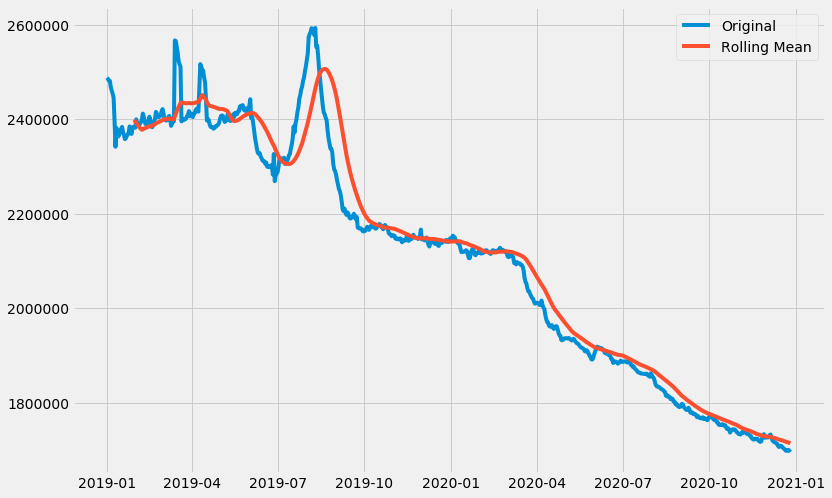

In [98]:
# 2G Voice Traffic
test_stationarity(all_df['VoiceSubs2G'])

Results of Dickey-Fuller Test:
Test Statistic           -0.811517
p-Value                   0.815716
# Lags Used               8.000000
Num of Obs Used         717.000000
Critical Value (1%)      -3.439503
Critical Value (5%)      -2.865579
Critical Value (10%)     -2.568921
dtype: float64


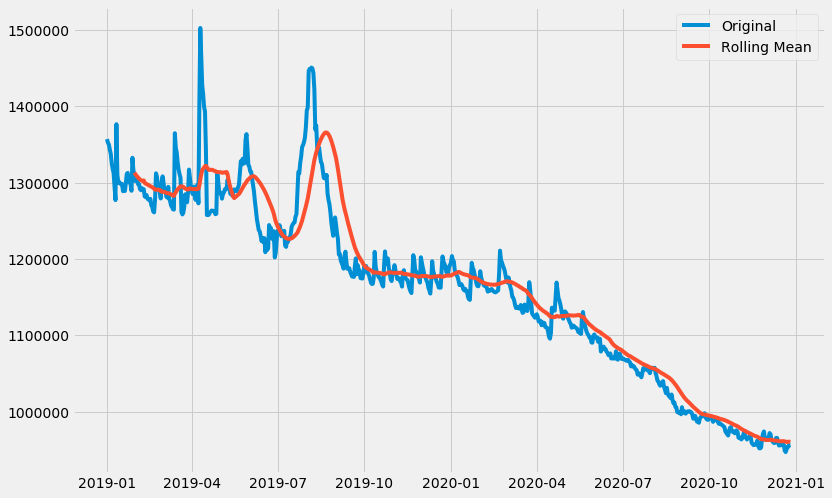

In [99]:
# 3G Voice Traffic
test_stationarity(all_df['VoiceSubs3G'])

Results of Dickey-Fuller Test:
Test Statistic           -0.298694
p-Value                   0.925689
# Lags Used              17.000000
Num of Obs Used         708.000000
Critical Value (1%)      -3.439620
Critical Value (5%)      -2.865631
Critical Value (10%)     -2.568948
dtype: float64


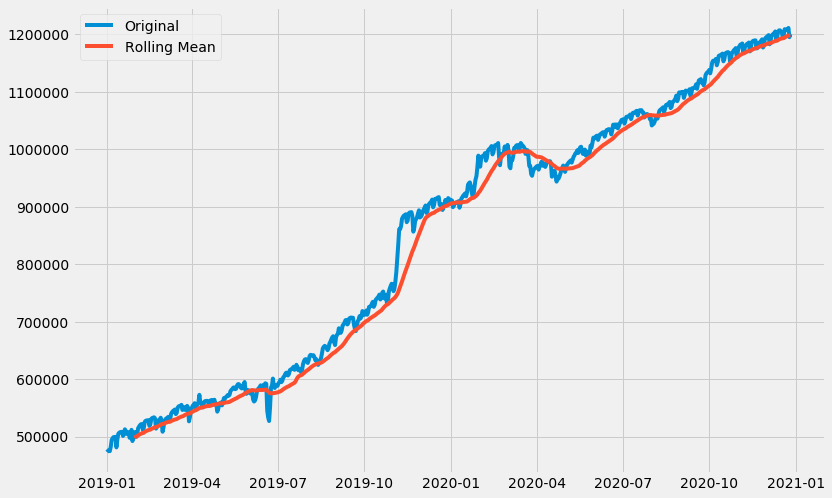

In [100]:
# VOLTE Traffic
test_stationarity(all_df['VoLTESubs'])

# Convert Time Series to Stationary

In [69]:
subs_2GDiffShifting = all_df['VoiceSubs2G'] - all_df['VoiceSubs2G'].shift()
subs_3GDiffShifting = all_df['VoiceSubs3G'] - all_df['VoiceSubs3G'].shift()
subs_LTEDiffShifting = all_df['VoLTESubs'] - all_df['VoLTESubs'].shift()

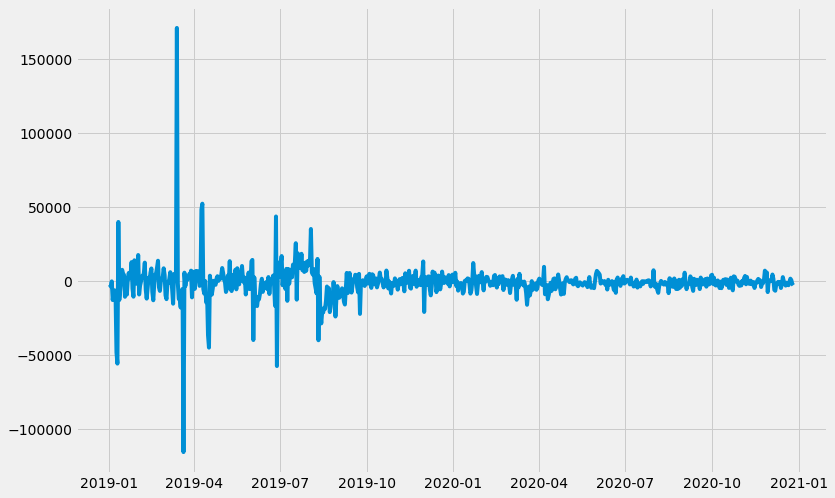

In [70]:
plt.plot(subs_2GDiffShifting)

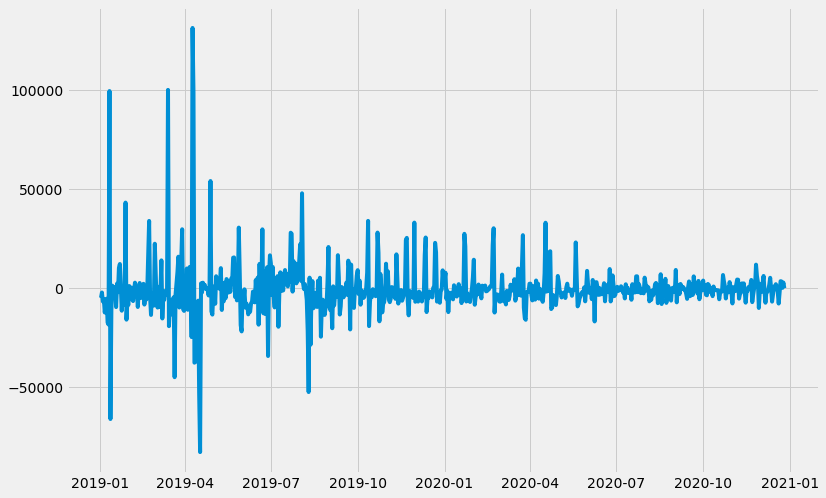

In [71]:
plt.plot(subs_3GDiffShifting)

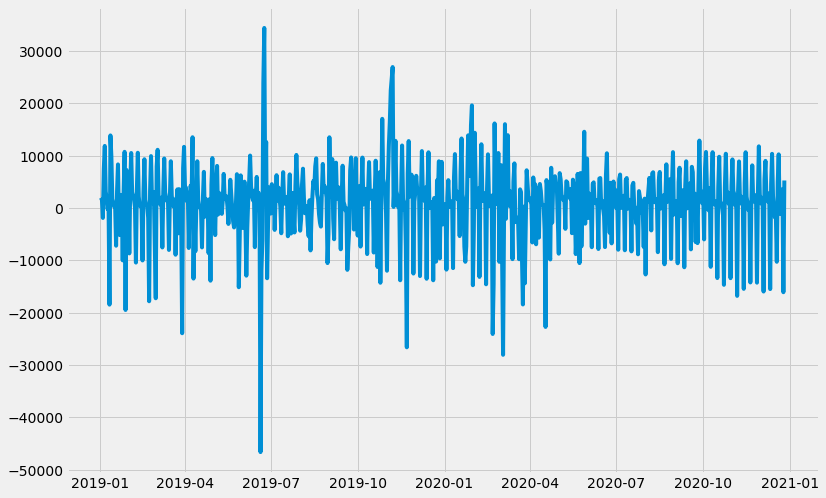

In [72]:
plt.plot(subs_LTEDiffShifting)

# Test Dickey Fuller on Shifted Data to confirm Stationarity

Results of Dickey-Fuller Test:
Test Statistic           -5.324518
p-Value                   0.000005
# Lags Used              20.000000
Num of Obs Used         704.000000
Critical Value (1%)      -3.439673
Critical Value (5%)      -2.865654
Critical Value (10%)     -2.568961
dtype: float64


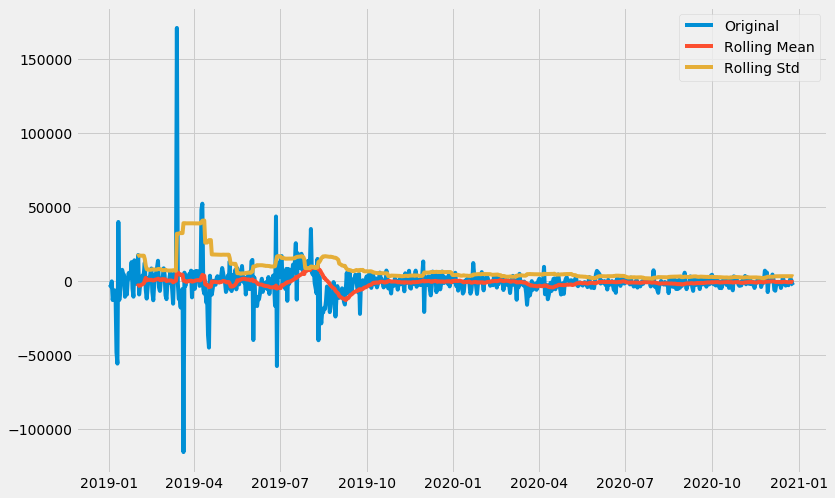

In [73]:
# 2G Subs
subs_2GDiffShifting.dropna(inplace=True)
test_stationarity(subs_2GDiffShifting)

Results of Dickey-Fuller Test:
Test Statistic         -1.194825e+01
p-Value                 4.378311e-22
# Lags Used             7.000000e+00
Num of Obs Used         7.170000e+02
Critical Value (1%)    -3.439503e+00
Critical Value (5%)    -2.865579e+00
Critical Value (10%)   -2.568921e+00
dtype: float64


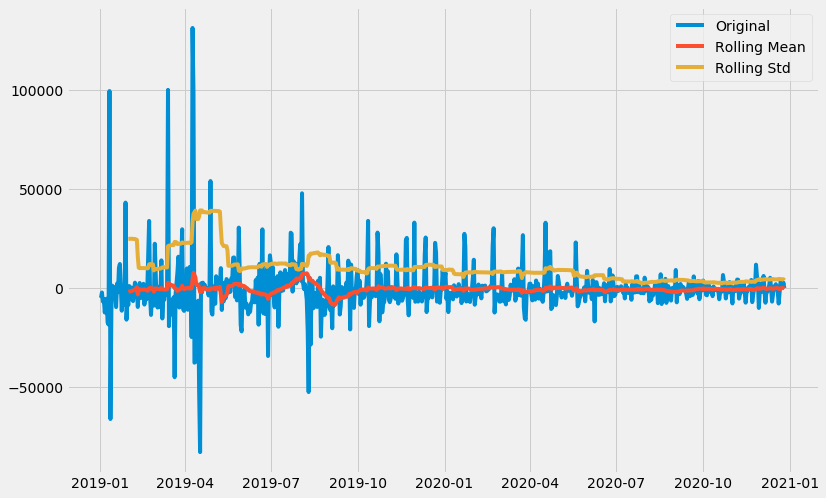

In [74]:
# 3G Subs
subs_3GDiffShifting.dropna(inplace=True)
test_stationarity(subs_3GDiffShifting)

Results of Dickey-Fuller Test:
Test Statistic           -5.172900
p-Value                   0.000010
# Lags Used              20.000000
Num of Obs Used         704.000000
Critical Value (1%)      -3.439673
Critical Value (5%)      -2.865654
Critical Value (10%)     -2.568961
dtype: float64


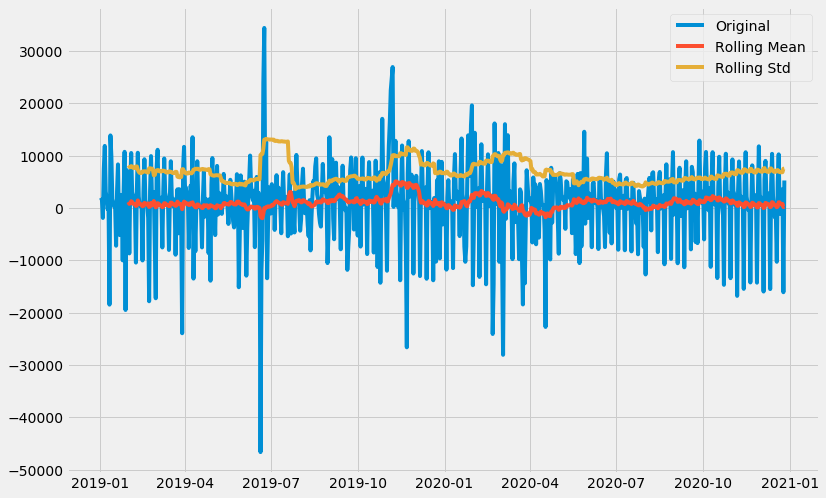

In [75]:
# LTE Subs
subs_LTEDiffShifting.dropna(inplace=True)
test_stationarity(subs_LTEDiffShifting)

# Decomposition of Time Series
#### 1) Trend
#### 2) Seasonality
#### 3) Residual

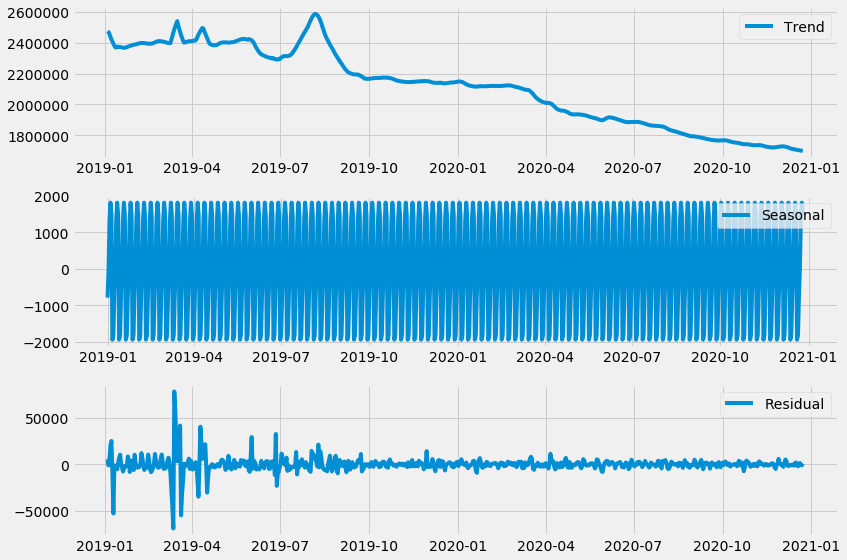

In [101]:
# Decomposition on 2G Subs

decomposition = seasonal_decompose(all_df['VoiceSubs2G'])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# plt.subplot(411)
# plt.plot(all_df['VoiceSubs2G'], label = 'Original')
# plt.legend(loc='upper right')
plt.subplot(311)
plt.plot(trend, label = 'Trend')
plt.legend(loc='upper right')
plt.subplot(312)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc='upper right')
plt.subplot(313)
plt.plot(residual, label = 'Residual')
plt.legend(loc='upper right')
plt.tight_layout()

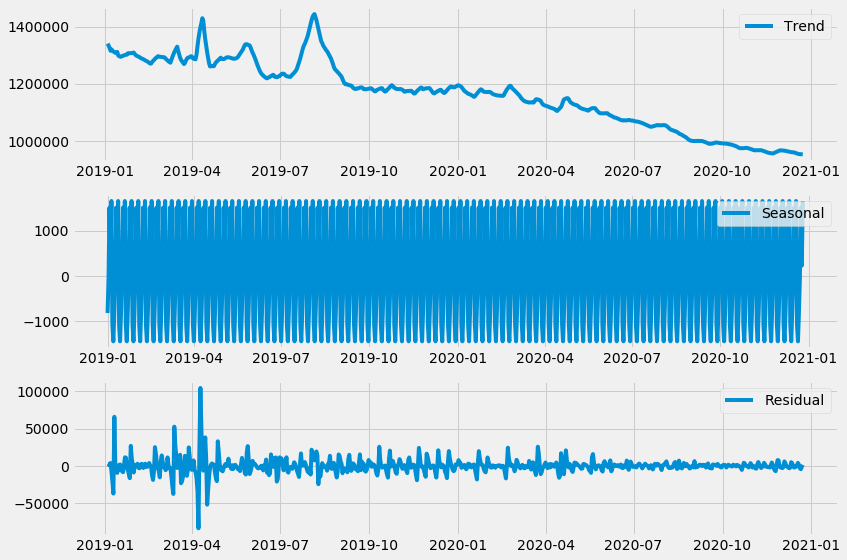

In [102]:
# Decomposition on 3G Subs

decomposition = seasonal_decompose(all_df['VoiceSubs3G'])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# plt.subplot(411)
# plt.plot(all_df['VoiceSubs3G'], label = 'Original')
# plt.legend(loc='upper right')
plt.subplot(311)
plt.plot(trend, label = 'Trend')
plt.legend(loc='upper right')
plt.subplot(312)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc='upper right')
plt.subplot(313)
plt.plot(residual, label = 'Residual')
plt.legend(loc='upper right')
plt.tight_layout()

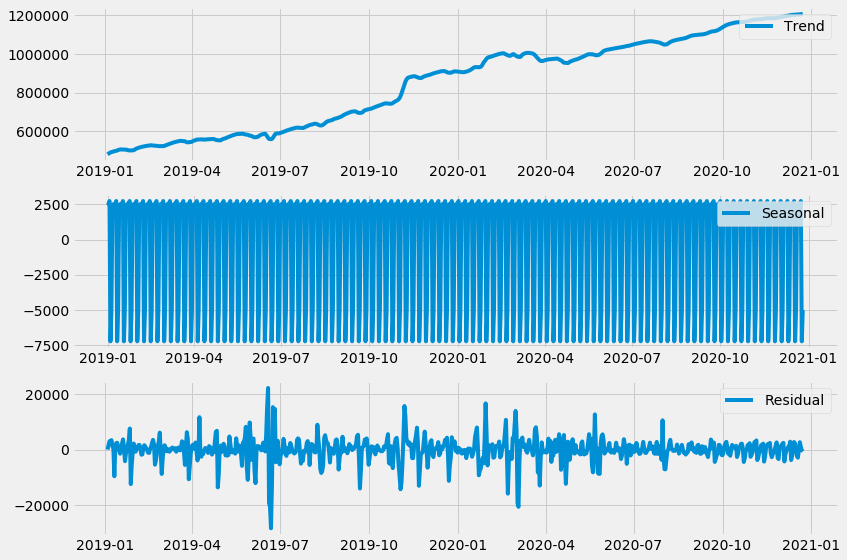

In [84]:
# Decomposition on VOLTE Subs

decomposition = seasonal_decompose(all_df['VoLTESubs'])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# plt.subplot(411)
# plt.plot(all_df['VoLTESubs'], label = 'Original')
# plt.legend(loc='upper right')
plt.subplot(311)
plt.plot(trend, label = 'Trend')
plt.legend(loc='upper right')
plt.subplot(312)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc='upper right')
plt.subplot(313)
plt.plot(residual, label = 'Residual')
plt.legend(loc='upper right')
plt.tight_layout()

# Make ACF and PACF Plots to get values of p (AR part) and q (MA part)

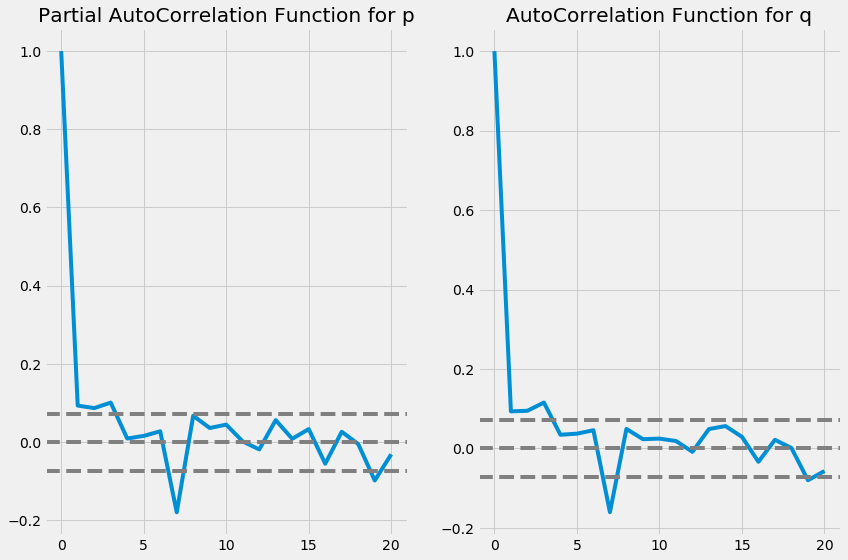

In [79]:
# For 2G Subs

lag_acf = acf(subs_2GDiffShifting, nlags=20)
lag_pacf = pacf(subs_2GDiffShifting, nlags=20, method = 'ols')
# ols = ordinary least square method
# nlags from Dickey Fuller Test i.e. 20

# Plot PACF
# Check where line drops to confidence level i.e. close to 0
# From below chart value of p=3
plt.subplot(121)
plt.plot(lag_pacf)
# Confidence Levels
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(subs_2GDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(subs_2GDiffShifting)),linestyle='--',color='gray')
plt.title('Partial AutoCorrelation Function for p')

# Plot ACF
# Check where line drops to confidence level i.e. close to 0
# From below chart value of d=3
plt.subplot(122)
plt.plot(lag_acf)
# Confidence Levels
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(subs_2GDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(subs_2GDiffShifting)),linestyle='--',color='gray')
plt.title('AutoCorrelation Function for q')
plt.tight_layout()

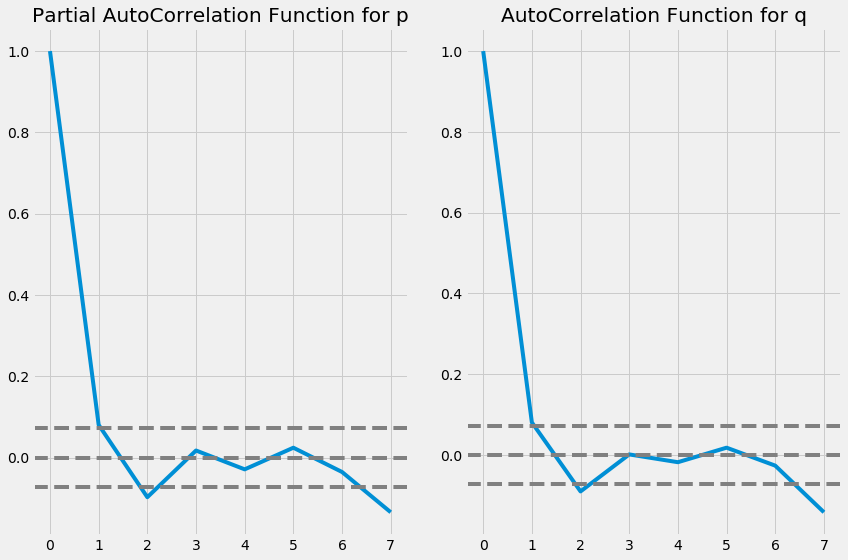

In [89]:
# For 3G Subs

lag_acf = acf(subs_3GDiffShifting, nlags=7)
lag_pacf = pacf(subs_3GDiffShifting, nlags=7, method = 'ols')
# ols = ordinary least square method
# nlags from Dickey Fuller Test i.e. 20

# Plot PACF
# Check where line drops to confidence level i.e. close to 0
# From below chart value of p=1
plt.subplot(121)
plt.plot(lag_pacf)
# Confidence Levels
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(subs_3GDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(subs_3GDiffShifting)),linestyle='--',color='gray')
plt.title('Partial AutoCorrelation Function for p')

# Plot ACF
# Check where line drops to confidence level i.e. close to 0
# From below chart value of d=1
plt.subplot(122)
plt.plot(lag_acf)
# Confidence Levels
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(subs_3GDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(subs_3GDiffShifting)),linestyle='--',color='gray')
plt.title('AutoCorrelation Function for q')
plt.tight_layout()

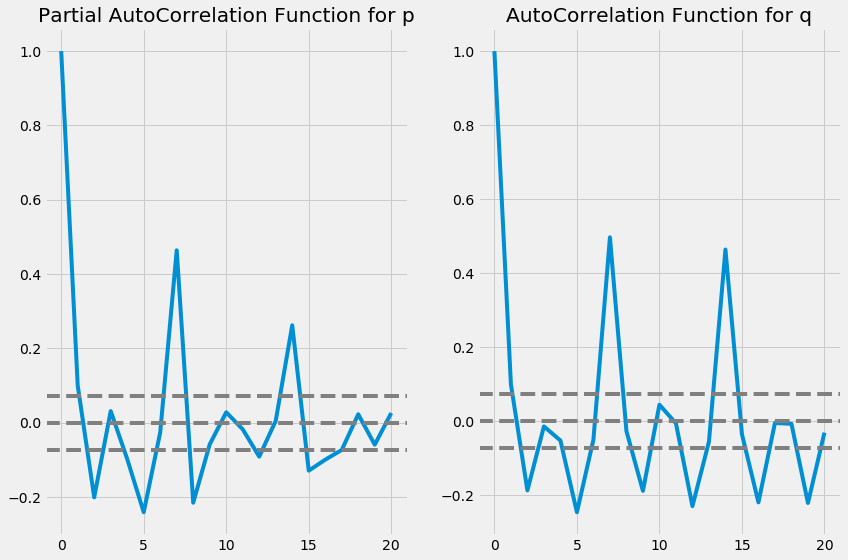

In [81]:
# For VOLTE Subs

lag_acf = acf(subs_LTEDiffShifting, nlags=20)
lag_pacf = pacf(subs_LTEDiffShifting, nlags=20, method = 'ols')
# ols = ordinary least square method
# nlags from Dickey Fuller Test i.e. 20

# Plot PACF
# Check where line drops to confidence level i.e. close to 0
# From below chart value of p=1
plt.subplot(121)
plt.plot(lag_pacf)
# Confidence Levels
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(subs_LTEDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(subs_LTEDiffShifting)),linestyle='--',color='gray')
plt.title('Partial AutoCorrelation Function for p')

# Plot ACF
# Check where line drops to confidence level i.e. close to 0
# From below chart value of d=1
plt.subplot(122)
plt.plot(lag_acf)
# Confidence Levels
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(subs_LTEDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(subs_LTEDiffShifting)),linestyle='--',color='gray')
plt.title('AutoCorrelation Function for q')
plt.tight_layout()

# Run ARIMA Model
##### p = (From PACF graph)
##### d = (From the count of shifting required to make data stationary)
##### q = (From ACF Graph)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 89567093665.9579')

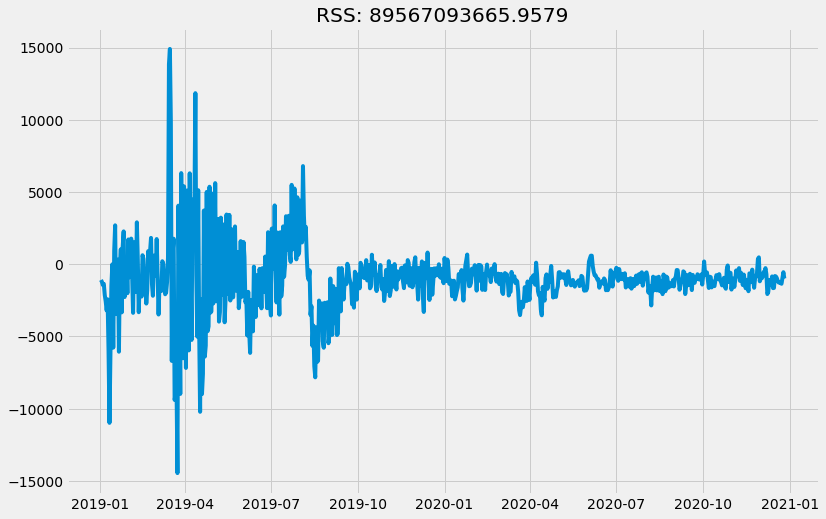

In [86]:
# For 2G Subs

model_2G = ARIMA(all_df['VoiceSubs2G'], order = (3,1,3) )
results_ARIMA_2G = model_2G.fit(disp=-1)

plt.plot(results_ARIMA_2G.fittedvalues)
plt.title('RSS: %.4f'%sum((results_ARIMA_2G.fittedvalues - subs_2GDiffShifting)**2))
# RSS = Residual sum of square, lower value is better

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 121874109920.1876')

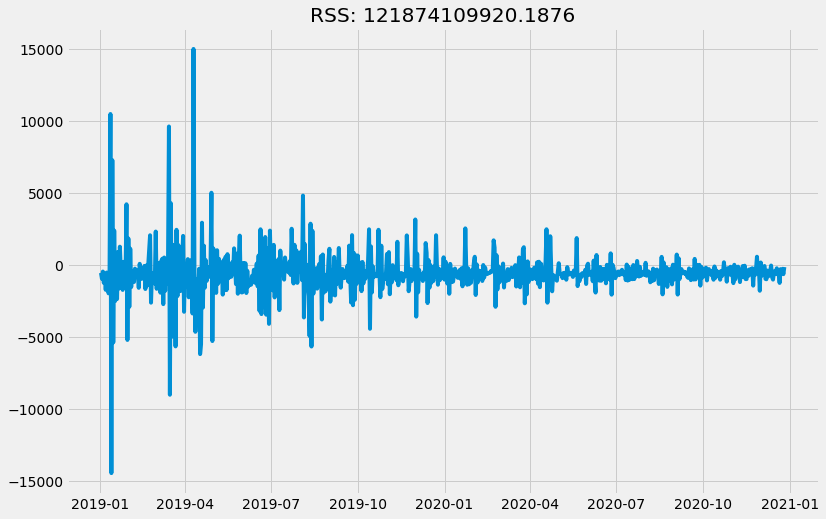

In [90]:
# For 3G Subs

model_3G = ARIMA(all_df['VoiceSubs3G'], order = (1,1,1) )
results_ARIMA_3G = model_3G.fit(disp=-1)

plt.plot(results_ARIMA_3G.fittedvalues)
plt.title('RSS: %.4f'%sum((results_ARIMA_3G.fittedvalues - subs_3GDiffShifting)**2))
# RSS = Residual sum of square, lower value is better

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 34434978271.6924')

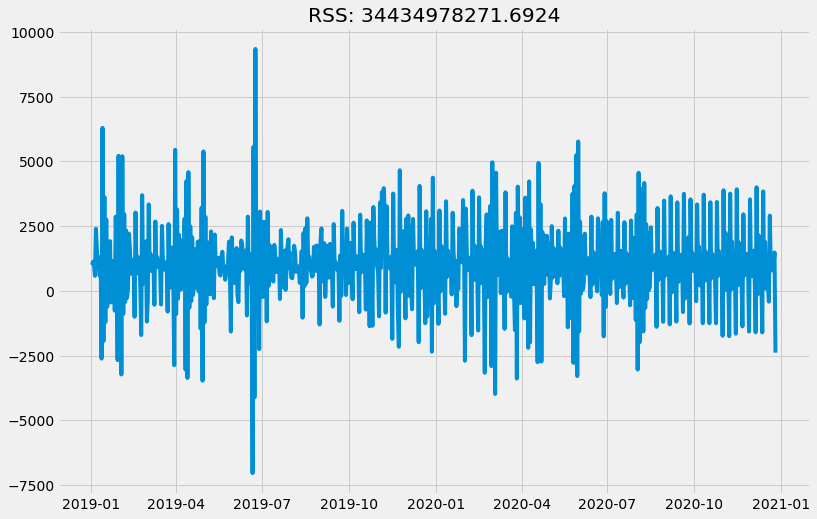

In [91]:
# For VOLTE Subs

model_LTE = ARIMA(all_df['VoLTESubs'], order = (1,1,1) )
results_ARIMA_LTE = model_LTE.fit(disp=-1)

plt.plot(results_ARIMA_LTE.fittedvalues)
plt.title('RSS: %.4f'%sum((results_ARIMA_LTE.fittedvalues - subs_LTEDiffShifting)**2))
# RSS = Residual sum of square, lower value is better

#  Calculate and Plot Future Predicted Values
#### Check number of datapoints in original dataset and then do prediction on (originalDataPoints + pointsRequiredInFuture)

In [93]:
all_df.shape

(726, 4)

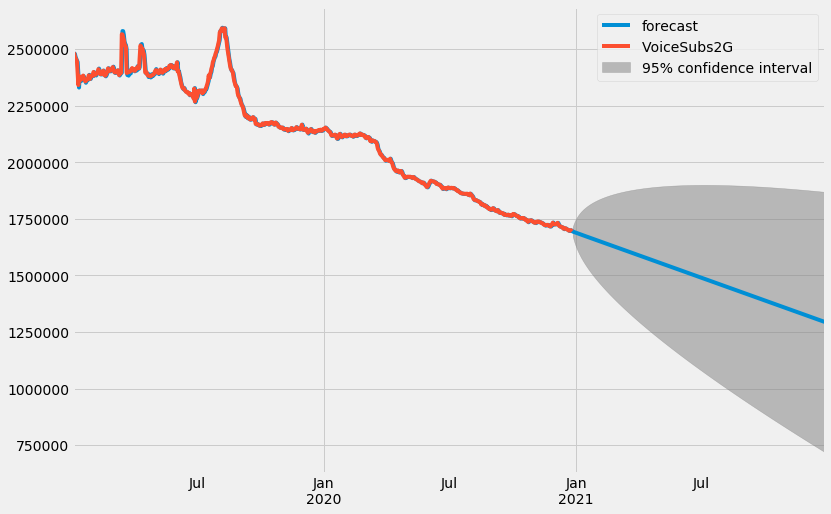

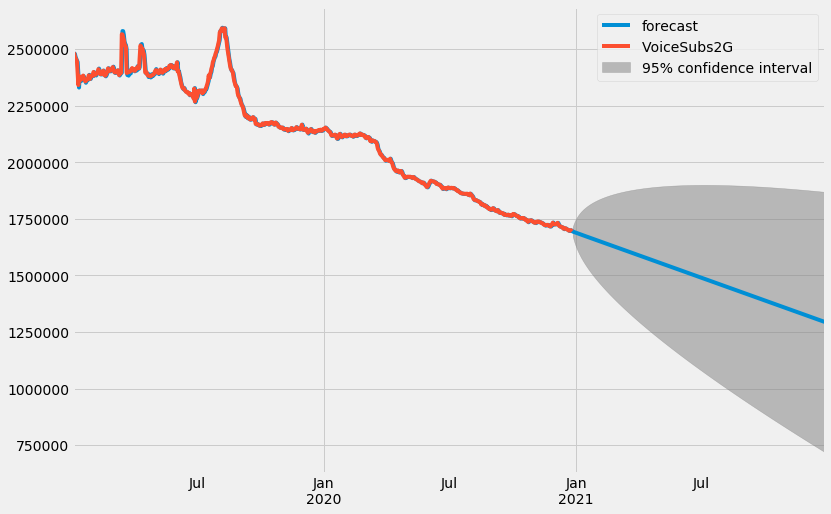

In [94]:
# Prediction for 2G Subs

# Predict data for 1 Year, i.e. 365 points
# Now totat data points will be {726+365} 1091 points 
results_ARIMA_2G.plot_predict(1,1091)

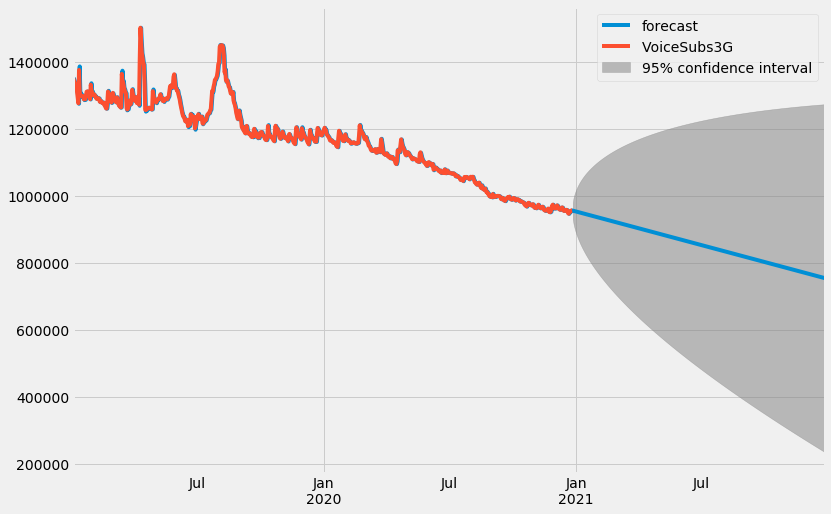

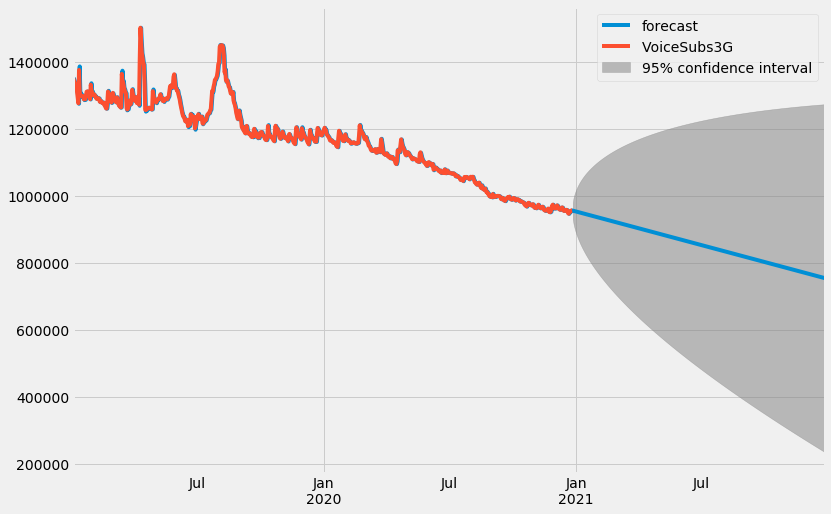

In [95]:
# Prediction for 3G Subs

# Predict data for 1 Year, i.e. 365 points
# Now totat data points will be {726+365} 1091 points 
results_ARIMA_3G.plot_predict(1,1091)

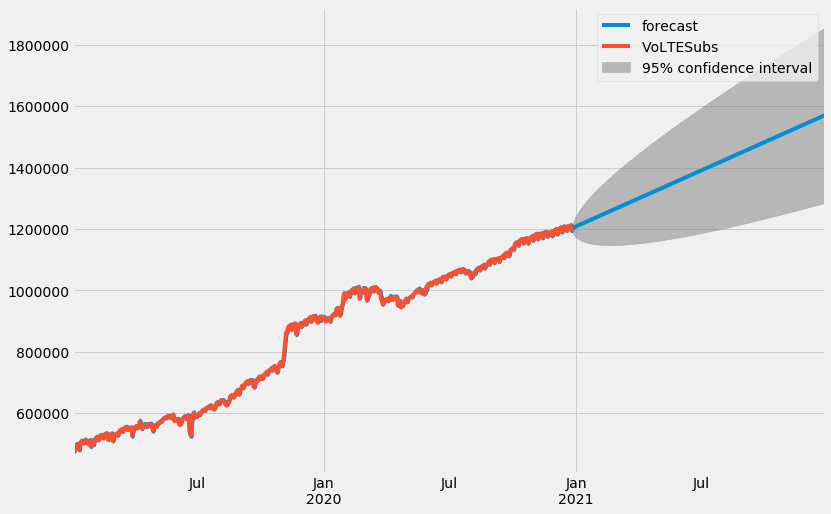

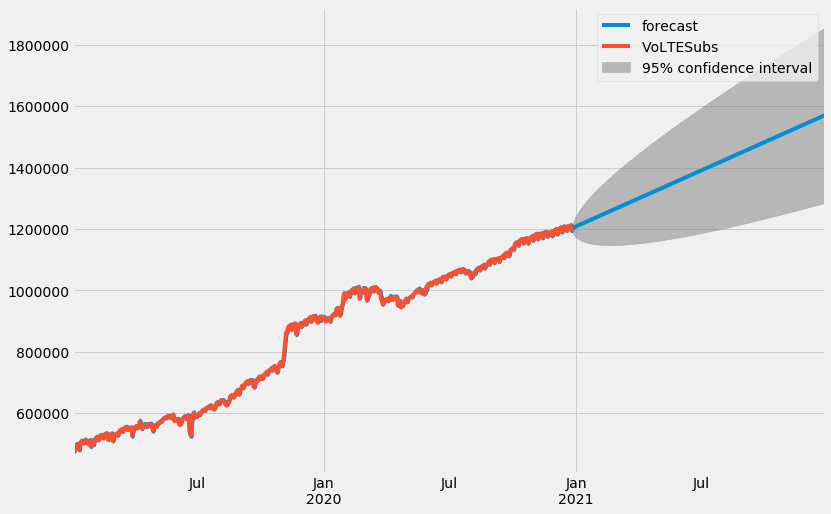

In [96]:
# Prediction for VOLTE Subs

# Predict data for 1 Year, i.e. 365 points
# Now totat data points will be {726+365} 1091 points 
results_ARIMA_LTE.plot_predict(1,1091)